<a href="https://colab.research.google.com/github/Kunal2873/deep_learn/blob/main/movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
train_labels[0]

np.int64(1)

In [ ]:
word_index=imdb.get_word_index()
reverse_word_index=dict( [(value,key) for (key,value) in word_index.items() ])
decoded_review="".join([reverse_word_index.get (i-3,"?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimensions=10000):
  results=np.zeros((len(sequences),dimensions))
  for i ,sequences in enumerate(sequences):
    for j in sequences:
      results[i,j]=1

  return results


x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow.keras import layers
model=keras.Sequential ([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
    ])


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]



In [ ]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.6972 - loss: 0.5944 - val_accuracy: 0.8601 - val_loss: 0.4025
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8947 - loss: 0.3384 - val_accuracy: 0.8848 - val_loss: 0.3139
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9203 - loss: 0.2466 - val_accuracy: 0.8614 - val_loss: 0.3331
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9387 - loss: 0.1955 - val_accuracy: 0.8819 - val_loss: 0.2939
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9509 - loss: 0.1607 - val_accuracy: 0.8877 - val_loss: 0.2779
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9600 - loss: 0.1344 - val_accuracy: 0.8854 - val_loss: 0.2917
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9679 - loss: 0.1121 - val_accuracy: 0.8836 - val_loss: 0.2958
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9751 - loss: 0.0933 - val_accuracy: 0.8762 - 

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

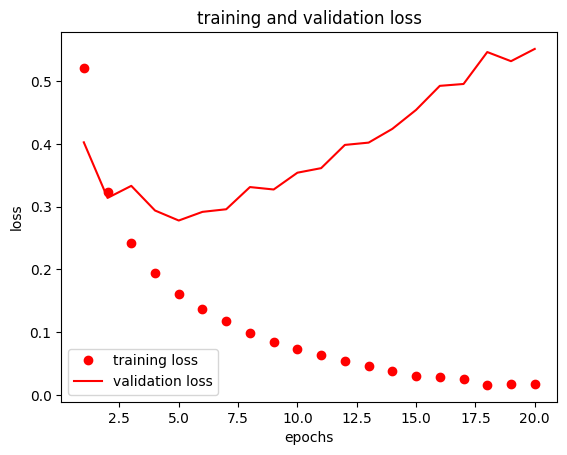

In [ ]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)


plt.plot(epochs,loss_values,'ro',label='training loss')
plt.plot(epochs,val_loss_values,'r',label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

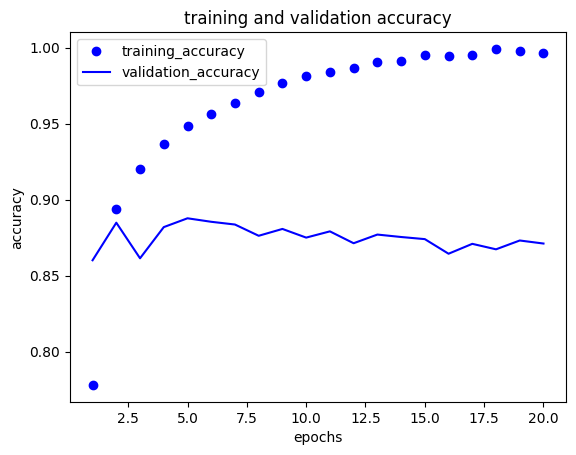

In [ ]:
acc=history_dict['accuracy']
val_accuracy=history_dict['val_accuracy']
plt.plot(epochs,acc,'bo',label='training_accuracy')
plt.plot(epochs,val_accuracy,'b',label='validation_accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model1=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')

])

In [ ]:
model1.compile(optimizer='rmsprop',loss ='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit(partial_x_train,partial_y_train,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9997 - loss: 0.0054 - val_accuracy: 0.8698 - val_loss: 0.6471
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9987 - loss: 0.0067 - val_accuracy: 0.8707 - val_loss: 0.6619
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9999 - loss: 0.0035 - val_accuracy: 0.8685 - val_loss: 0.6919
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9991 - loss: 0.0063 - val_accuracy: 0.8706 - val_loss: 0.6955
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9998 - loss: 0.0026 - val_accuracy: 0.8692 - val_loss: 0.7162


In [ ]:
results=model.evaluate(x_test,y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8502 - loss: 0.7985


[0.7755279541015625, 0.8554400205612183]

In [ ]:
history1_dict=history1.history
history1_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

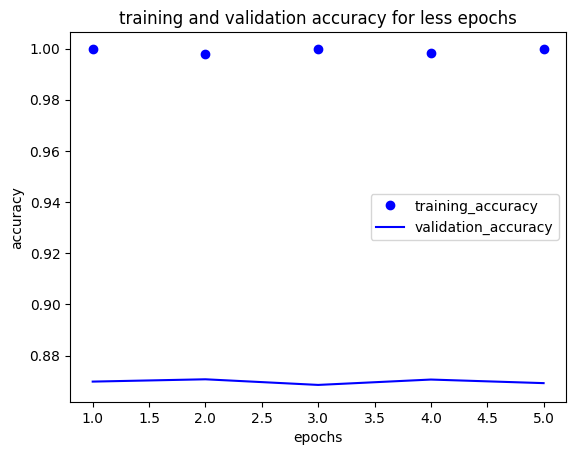

In [ ]:
acc=history1_dict['accuracy']
val_acc=history1_dict['val_accuracy']
epochs=range(1,len(history1_dict['loss'])+1)
plt.plot(epochs,acc,'bo',label='training_accuracy')
plt.plot(epochs,val_acc,'b',label='validation_accuracy')
plt.title('training and validation accuracy for less epochs')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()